In [1]:
import sys
#print(sys.executable)
#!"c:\program files\python37\python.exe" -m pip install pandas-profiling
#!"c:\program files\python37\python.exe" -m pip install urlopen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import pandas_profiling
import gc
import datetime
%matplotlib inline
plt.style.use('ggplot')
from urllib.request import urlopen
from zipfile import ZipFile

c:\program files\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('./ecommerce_data.csv', encoding='ISO-8859-1')

In [3]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [6]:
df[df.isnull().any(axis=1)].head(10)

InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom  
1447  12/1/2010 14:32       1.66         NaN  United Kingdom  
1448  12/1/2010 14:32       2.51         NaN  United Kingdom  
1449  12/1/2010 14:32       0.43         NaN  United Kingdom  
1450  12/1/2010 14:32       0.43         NaN  United Kingdom  
1451  12/1/2010 14:32       0.43         NaN  United Kingdom

In [7]:
df['InvoiceData'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  object        
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   InvoiceData  541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [9]:
df_no_missing = df.dropna()

In [10]:
df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceData    0
Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [11]:
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceData         0
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [12]:
df[df.isnull().any(axis=1)].head(10)

InvoiceNo StockCode                          Description  Quantity  \
622     536414     22139                                  NaN        56   
1443    536544     21773      DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774      DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786                   POLKADOT RAIN HAT          4   
1446    536544     21787                RAIN PONCHO RETROSPOT         2   
1447    536544     21790                   VINTAGE SNAP CARDS         9   
1448    536544     21791   VINTAGE HEADS AND TAILS CARD GAME          2   
1449    536544     21801  CHRISTMAS TREE DECORATION WITH BELL        10   
1450    536544     21802      CHRISTMAS TREE HEART DECORATION         9   
1451    536544     21803       CHRISTMAS TREE STAR DECORATION        11   

          InvoiceDate  UnitPrice  CustomerID         Country  \
622   12/1/2010 11:52       0.00         NaN  United Kingdom   
1443  12/1/2010 14:32       2.51         NaN  United Kingdom   
1444  12/1/2010 14:32       2.51         NaN  United Kingdom   
1445  12/1/2010 14:32       0.85         NaN  United Kingdom   
1446  12/1/2010 14:32       1.66         NaN  United Kingdom   
1447  12/1/2010 14:32       1.66         NaN  United Kingdom   
1448  12/1/2010 14:32       2.51         NaN  United Kingdom   
1449  12/1/2010 14:32       0.43         NaN  United Kingdom   
1450  12/1/2010 14:32       0.43         NaN  United Kingdom   
1451  12/1/2010 14:32       0.43         NaN  United Kingdom   

             InvoiceData  
622  2010-12-01 11:52:00  
1443 2010-12-01 14:32:00  
1444 2010-12-01 14:32:00  
1445 2010-12-01 14:32:00  
1446 2010-12-01 14:32:00  
1447 2010-12-01 14:32:00  
1448 2010-12-01 14:32:00  
1449 2010-12-01 14:32:00  
1450 2010-12-01 14:32:00  
1451 2010-12-01 14:32:00

In [13]:
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')

In [14]:
df2 = df_no_missing.copy()

In [15]:
df2.describe().round(2)

Quantity  UnitPrice  CustomerID
count  406829.00  406829.00   406829.00
mean       12.06       3.46    15287.69
std       248.69      69.32     1713.60
min    -80995.00       0.00    12346.00
25%         2.00       1.25    13953.00
50%         5.00       1.95    15152.00
75%        12.00       3.75    16791.00
max     80995.00   38970.00    18287.00

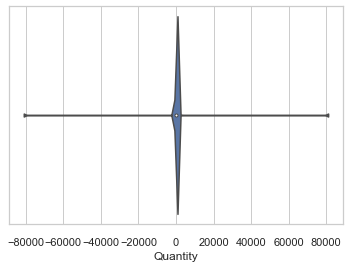

In [16]:
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2['Quantity'])

In [17]:
df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

Quantity  UnitPrice  CustomerID
count  397924.00  397924.00   397924.00
mean       13.02       3.12    15294.32
std       180.42      22.10     1713.17
min         1.00       0.00    12346.00
25%         2.00       1.25    13969.00
50%         6.00       1.95    15159.00
75%        12.00       3.75    16795.00
max     80995.00    8142.75    18287.00

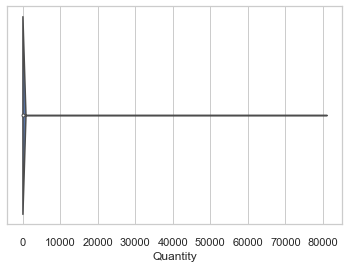

In [18]:
ax = sns.violinplot(x=df2['Quantity'])

In [19]:
df2['month_year'] = df['Quantity'] * df2['UnitPrice']
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         InvoiceData  \
0  12/1/2010 8:26       2.55       17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75       17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   

   month_year  
0       15.30  
1       20.34  
2       22.00  
3       20.34  
4       20.34

In [20]:
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         InvoiceData  \
0  12/1/2010 8:26       2.55       17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75       17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   

   month_year  AmountSpent  
0       15.30        15.30  
1       20.34        20.34  
2       22.00        22.00  
3       20.34        20.34  
4       20.34        20.34

In [21]:
df2['month_year'] = df['InvoiceData'].dt.to_period('M')
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         InvoiceData  \
0  12/1/2010 8:26       2.55       17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75       17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   

  month_year  AmountSpent  
0    2010-12        15.30  
1    2010-12        20.34  
2    2010-12        22.00  
3    2010-12        20.34  
4    2010-12        20.34

In [22]:
L = ['year', 'month','day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df['InvoiceData'].dt,i).rename(i) for i in L), axis=1))
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         InvoiceData  \
0  12/1/2010 8:26       2.55       17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75       17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   

  month_year  AmountSpent  year  month  day  dayofweek  dayofyear  weekofyear  \
0    2010-12        15.30  2010     12    1          2        335          48   
1    2010-12        20.34  2010     12    1          2        335          48   
2    2010-12        22.00  2010     12    1          2        335          48   
3    2010-12        20.34  2010     12    1          2        335          48   
4    2010-12        20.34  2010     12    1          2        335          48   

   quarter  
0        4  
1        4  
2        4  
3        4  
4        4

In [23]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1], dtype=int64)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  object        
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   InvoiceData  397924 non-null  datetime64[ns]
 9   month_year   397924 non-null  period[M]     
 10  AmountSpent  397924 non-null  float64       
 11  year         397924 non-null  int64         
 12  month        397924 non-null  int64         
 13  day          397924 non-null  int64         
 14  dayofweek    397924 non-null  int64         
 15  dayofyear    397924 non-null  int6

In [25]:
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         InvoiceData  \
0  12/1/2010 8:26       2.55       17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75       17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   

  month_year  AmountSpent  year  month  day  dayofweek  dayofyear  weekofyear  \
0    2010-12        15.30  2010     12    1          3        335          48   
1    2010-12        20.34  2010     12    1          3        335          48   
2    2010-12        22.00  2010     12    1          3        335          48   
3    2010-12        20.34  2010     12    1          3        335          48   
4    2010-12        20.34  2010     12    1          3        335          48   

   quarter  
0        4  
1        4  
2        4  
3        4  
4        4

In [26]:
sales_per_cut = df2.groupby(by=['CustomerID', 'Country'], as_index = False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cut.columns = ['CustomerID', 'Country', 'NumberOfSales']
sales_per_cut.head(10)

CustomerID         Country  NumberOfSales
4019       17841  United Kingdom           7847
1888       14911            EIRE           5677
1298       14096  United Kingdom           5111
334        12748  United Kingdom           4596
1670       14606  United Kingdom           2700
2185       15311  United Kingdom           2379
1698       14646     Netherlands           2080
570        13089  United Kingdom           1818
699        13263  United Kingdom           1677
1443       14298  United Kingdom           1637

In [27]:
orders = df2.groupby(by=['CustomerID', 'Country'], as_index = False)['InvoiceNo'].count()

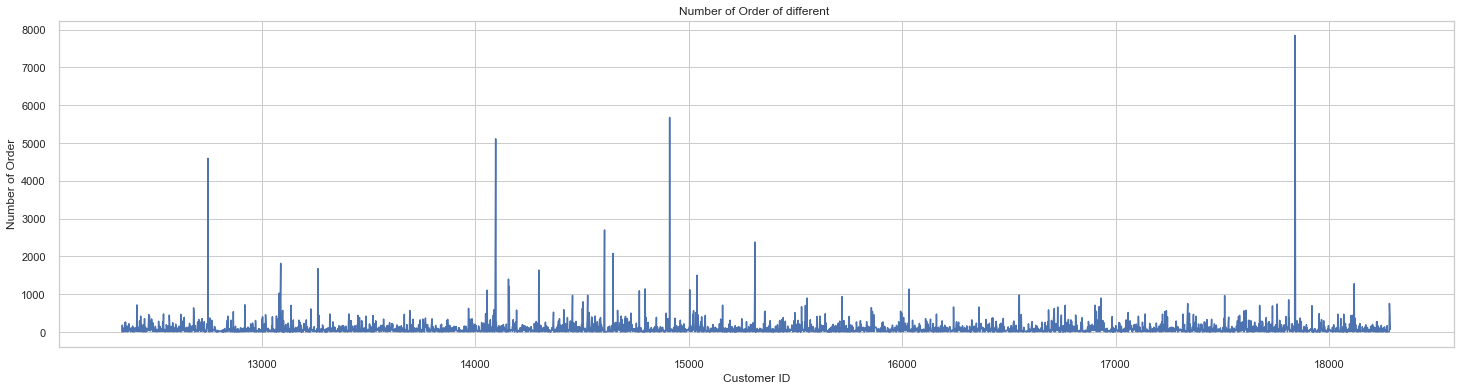

In [28]:
plt.subplots(figsize=(25,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Order')
plt.title('Number of Order of different ')
plt.show()

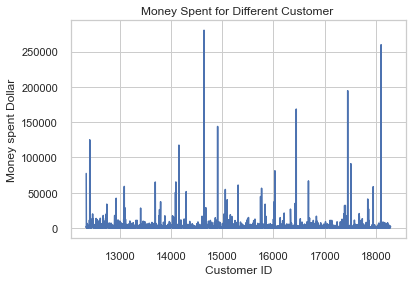

In [29]:
moneyspent = df2.groupby(by=['CustomerID', 'Country'], as_index = False)['AmountSpent'].sum()
plt.plot(moneyspent.CustomerID, moneyspent.AmountSpent)
plt.xlabel('Customer ID')
plt.ylabel('Money spent Dollar')
plt.title('Money Spent for Different Customer ')
plt.show()

In [30]:

spent_per_cust = df2.groupby(by=["CustomerID", "Country"], as_index=False)['AmountSpent'].sum().sort_values(by="AmountSpent", ascending=False)
spent_per_cust.columns = ["CustomerID", "Country","TotalSpent"]
spent_per_cust.head(10)

CustomerID         Country  TotalSpent
1698       14646     Netherlands   280206.02
4210       18102  United Kingdom   259657.30
3737       17450  United Kingdom   194550.79
3017       16446  United Kingdom   168472.50
1888       14911            EIRE   143825.06
57         12415       Australia   124914.53
1342       14156            EIRE   117379.63
3780       17511  United Kingdom    91062.38
2711       16029  United Kingdom    81024.84
0          12346  United Kingdom    77183.60

In [31]:
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country         InvoiceData  \
0  12/1/2010 8:26       2.55       17850  United Kingdom 2010-12-01 08:26:00   
1  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
2  12/1/2010 8:26       2.75       17850  United Kingdom 2010-12-01 08:26:00   
3  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   
4  12/1/2010 8:26       3.39       17850  United Kingdom 2010-12-01 08:26:00   

  month_year  AmountSpent  year  month  day  dayofweek  dayofyear  weekofyear  \
0    2010-12        15.30  2010     12    1          3        335          48   
1    2010-12        20.34  2010     12    1          3        335          48   
2    2010-12        22.00  2010     12    1          3        335          48   
3    2010-12        20.34  2010     12    1          3        335          48   
4    2010-12        20.34  2010     12    1          3        335          48   

   quarter  
0        4  
1        4  
2        4  
3        4  
4        4

In [32]:
df2['InvoiceDate'] = pd.to_datetime(df2.InvoiceDate, format='%m/%d/%Y %H:%M')
df2.insert(loc=2, column='year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [33]:
df2.head()

InvoiceNo StockCode  year_month                          Description  \
0    536365    85123A      201012   WHITE HANGING HEART T-LIGHT HOLDER   
1    536365     71053      201012                  WHITE METAL LANTERN   
2    536365    84406B      201012       CREAM CUPID HEARTS COAT HANGER   
3    536365    84029G      201012  KNITTED UNION FLAG HOT WATER BOTTLE   
4    536365    84029E      201012       RED WOOLLY HOTTIE WHITE HEART.   

   Quantity  hour         InvoiceDate  UnitPrice  CustomerID         Country  \
0         6     8 2010-12-01 08:26:00       2.55       17850  United Kingdom   
1         6     8 2010-12-01 08:26:00       3.39       17850  United Kingdom   
2         8     8 2010-12-01 08:26:00       2.75       17850  United Kingdom   
3         6     8 2010-12-01 08:26:00       3.39       17850  United Kingdom   
4         6     8 2010-12-01 08:26:00       3.39       17850  United Kingdom   

          InvoiceData month_year  AmountSpent  year  month  day  dayofweek  \
0 2010-12-01 08:26:00    2010-12        15.30  2010     12    1          3   
1 2010-12-01 08:26:00    2010-12        20.34  2010     12    1          3   
2 2010-12-01 08:26:00    2010-12        22.00  2010     12    1          3   
3 2010-12-01 08:26:00    2010-12        20.34  2010     12    1          3   
4 2010-12-01 08:26:00    2010-12        20.34  2010     12    1          3   

   dayofyear  weekofyear  quarter  
0        335          48        4  
1        335          48        4  
2        335          48        4  
3        335          48        4  
4        335          48        4

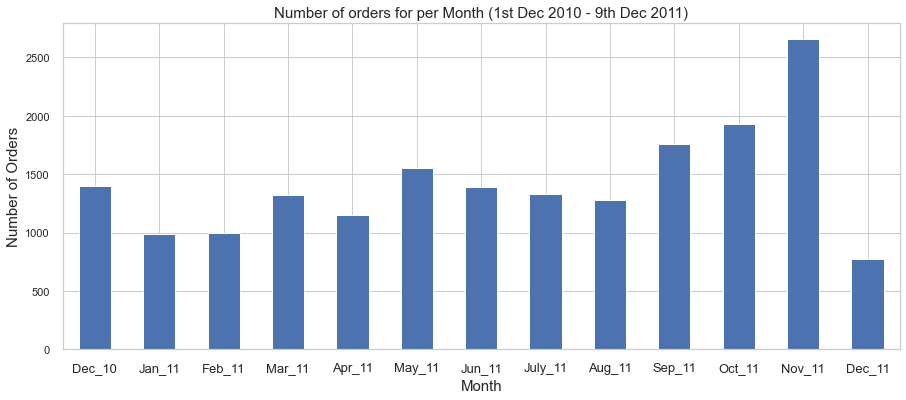

In [34]:
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [35]:
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

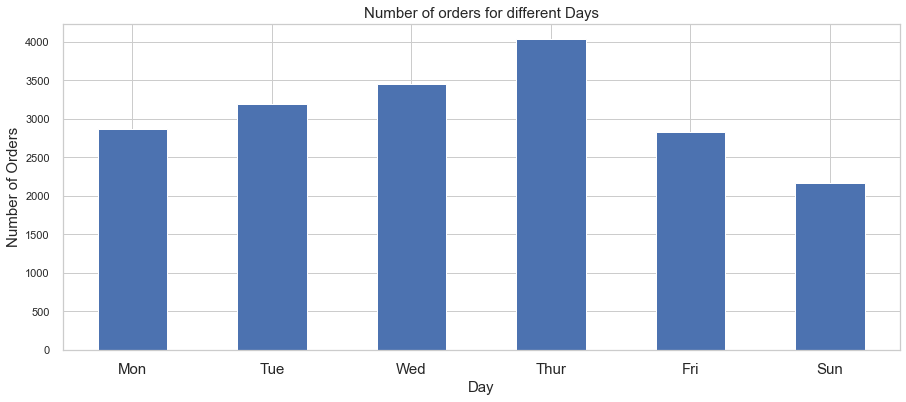

In [36]:
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

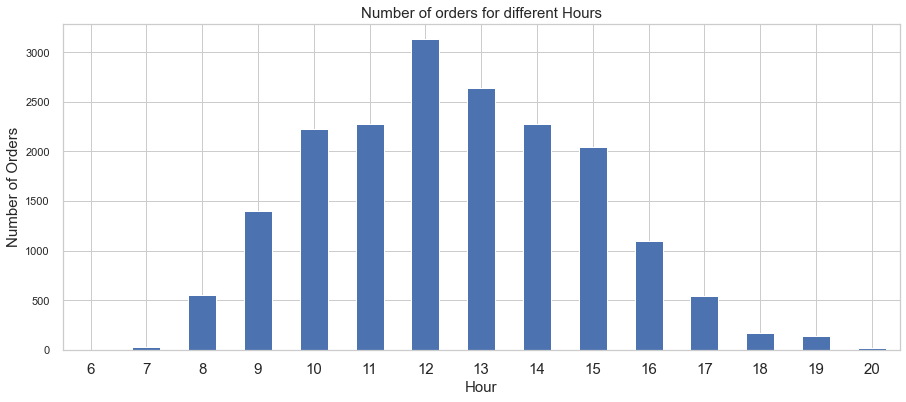

In [37]:
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)
plt.show()

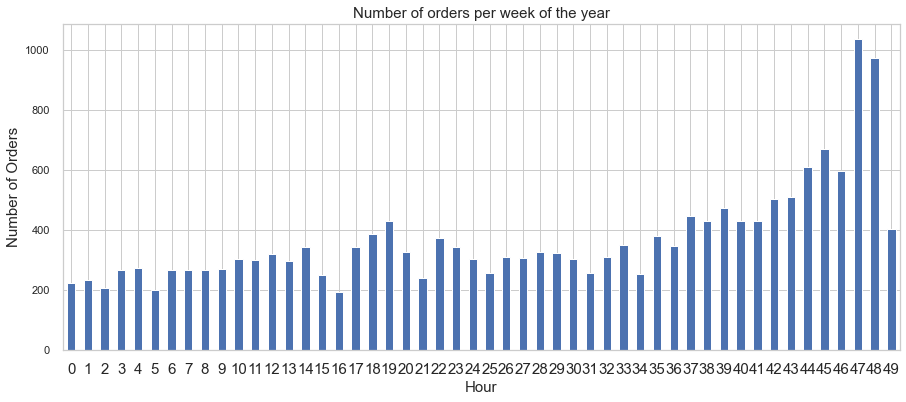

In [38]:
ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders per week of the year',fontsize=15)
ax.set_xticklabels(range(0,52), rotation='horizontal', fontsize=15)
plt.show()

In [39]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

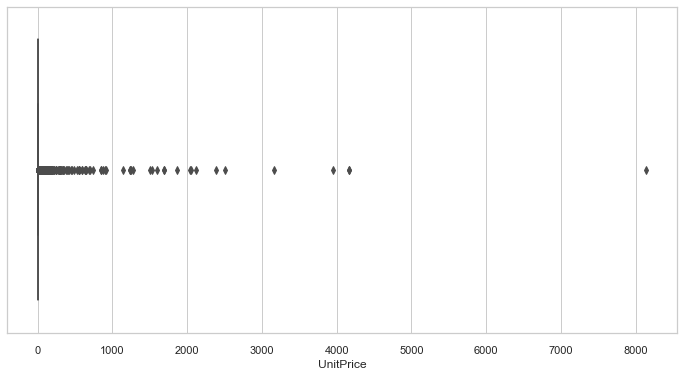

In [40]:
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [41]:
df_free = df2[df2.UnitPrice == 0]
print(len(df_free))
df_free.head()

40


InvoiceNo StockCode  year_month                   Description  Quantity  \
9302     537197     22841      201012  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580      201012  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      201012      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090      201101       PAPER BUNTING RETROSPOT        24   
47070    540372     22553      201101        PLASTERS IN TIN SKULLS        24   

       hour         InvoiceDate  UnitPrice  CustomerID         Country  \
9302     14 2010-12-05 14:02:00        0.0       12647         Germany   
33576    14 2010-12-16 14:36:00        0.0       16560  United Kingdom   
40089    13 2010-12-21 13:45:00        0.0       14911            EIRE   
47068    16 2011-01-06 16:41:00        0.0       13081  United Kingdom   
47070    16 2011-01-06 16:41:00        0.0       13081  United Kingdom   

              InvoiceData month_year  AmountSpent  year  month  day  \
9302  2010-12-05 14:02:00    2010-12          0.0  2010     12    5   
33576 2010-12-16 14:36:00    2010-12          0.0  2010     12   16   
40089 2010-12-21 13:45:00    2010-12          0.0  2010     12   21   
47068 2011-01-06 16:41:00    2011-01          0.0  2011      1    6   
47070 2011-01-06 16:41:00    2011-01          0.0  2011      1    6   

       dayofweek  dayofyear  weekofyear  quarter  
9302           7        339          48        4  
33576          4        350          50        4  
40089          2        355          51        4  
47068          4          6           1        1  
47070          4          6           1        1

In [42]:
df_free.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

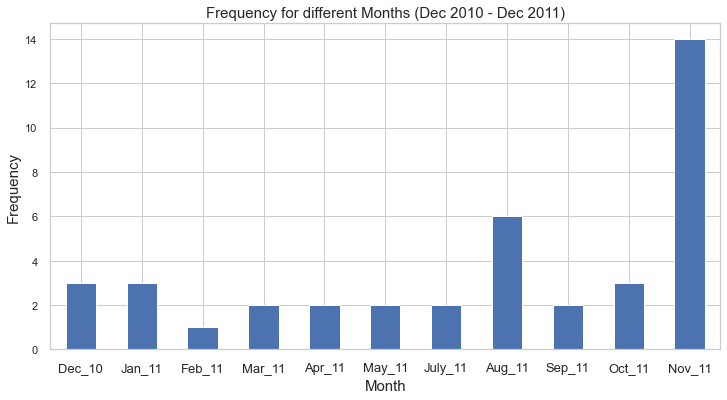

In [43]:
ax = df_free.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal', fontsize=13)
plt.show()

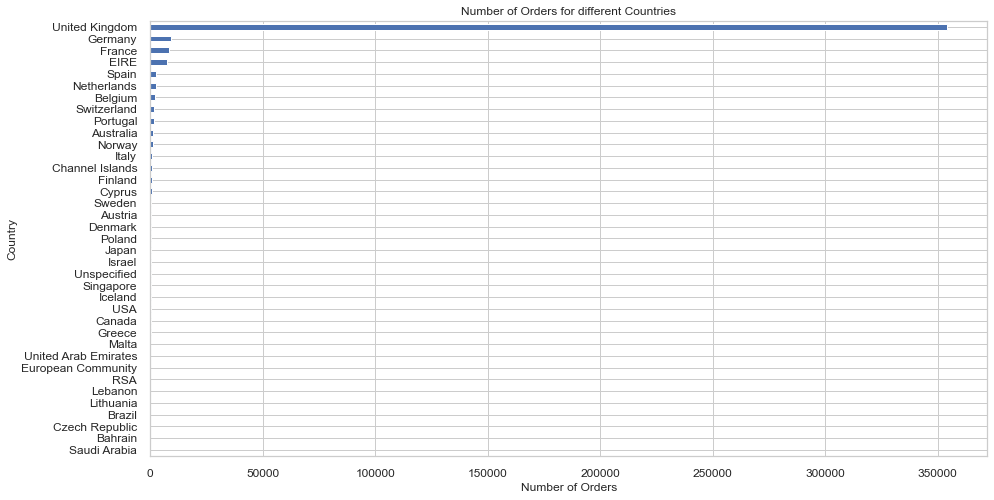

In [46]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

# plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

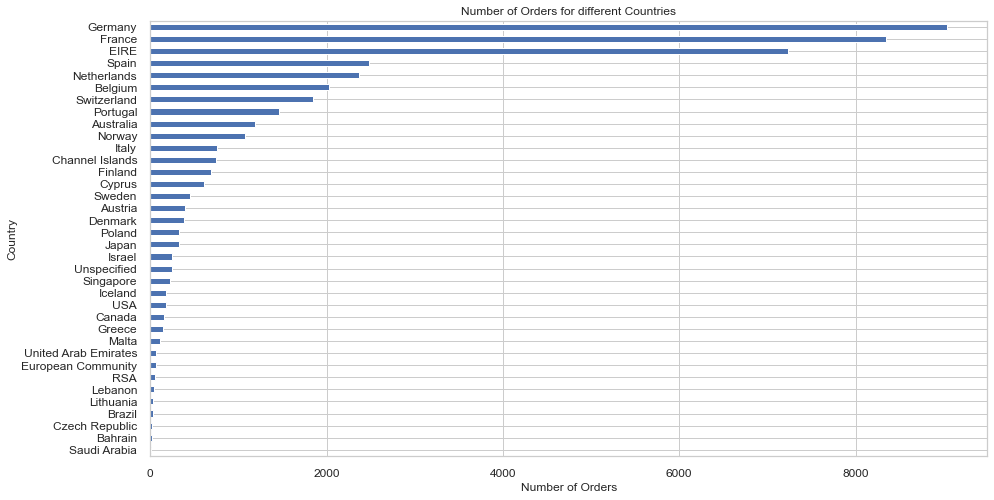

In [47]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()
group_country_orders_without_uk = group_country_orders.copy()
del group_country_orders_without_uk['United Kingdom']

# plot number of unique customers in each country (without UK)
plt.subplots(figsize=(15,8))
group_country_orders_without_uk.plot(kind='barh', fontsize=12)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

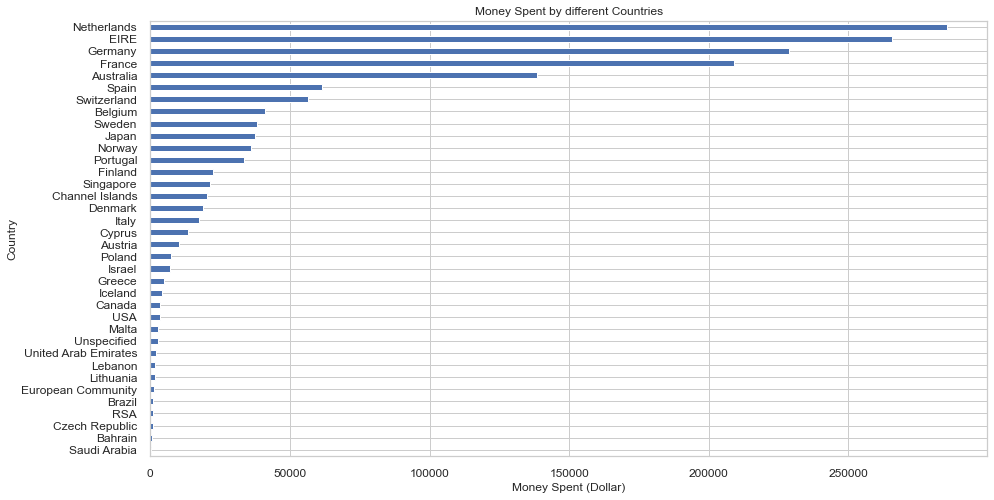

In [49]:
group_country_amount_spent = df2.groupby('Country')['AmountSpent'].sum().sort_values()
del group_country_amount_spent['United Kingdom']

# plot total money spent by each country (without UK)
plt.subplots(figsize=(15,8))
group_country_amount_spent.plot(kind='barh', fontsize=12)
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()

In [50]:
print('Date Range: %s to %s' % (df2['InvoiceDate'].min(), df2['InvoiceDate'].max()))

# Since Our data ends at Nov-30 2011, we're taking all of the transactions that occurred before December 01, 2011 
df2 = df2.loc[df2['InvoiceDate'] < '2011-12-01']

Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [51]:
invoice_customer_df = df2.groupby(by=['InvoiceNo', 'InvoiceDate']).agg({'AmountSpent': sum, 'CustomerID': max,'Country': max,}).reset_index()
invoice_customer_df.head()

InvoiceNo         InvoiceDate  AmountSpent  CustomerID         Country
0    536365 2010-12-01 08:26:00       139.12       17850  United Kingdom
1    536366 2010-12-01 08:28:00        22.20       17850  United Kingdom
2    536367 2010-12-01 08:34:00       278.73       13047  United Kingdom
3    536368 2010-12-01 08:34:00        70.05       13047  United Kingdom
4    536369 2010-12-01 08:35:00        17.85       13047  United Kingdom

In [52]:
invoice_customer_df.sort_values(by='AmountSpent', ascending=False).head(10)

InvoiceNo         InvoiceDate  AmountSpent  CustomerID         Country
1911     541431 2011-01-18 10:01:00     77183.60       12346  United Kingdom
7949     556444 2011-06-10 15:28:00     38970.00       15098  United Kingdom
12446    567423 2011-09-20 11:05:00     31698.16       17450  United Kingdom
8135     556917 2011-06-15 13:37:00     22775.93       12415       Australia
14487    572209 2011-10-21 12:08:00     22206.00       18102  United Kingdom
12438    567381 2011-09-20 10:12:00     22104.80       17450  United Kingdom
10869    563614 2011-08-18 08:51:00     21880.44       12415       Australia
5481     550461 2011-04-18 13:20:00     21535.90       15749  United Kingdom
14399    572035 2011-10-20 12:03:00     20277.92       14646     Netherlands
10637    563076 2011-08-11 16:12:00     19150.66       14646     Netherlands

In [54]:
monthly_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
  pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').nunique()['CustomerID']

monthly_repeat_customers_df

InvoiceDate
2010-12-31    263
2011-01-31    153
2011-02-28    153
2011-03-31    203
2011-04-30    170
2011-05-31    281
2011-06-30    220
2011-07-31    227
2011-08-31    198
2011-09-30    272
2011-10-31    324
2011-11-30    541
Freq: M, Name: CustomerID, dtype: int64

In [55]:
monthly_unique_customers_df = df2.set_index('InvoiceDate')['CustomerID'].resample('M').nunique()
monthly_unique_customers_df

InvoiceDate
2010-12-31     885
2011-01-31     741
2011-02-28     758
2011-03-31     974
2011-04-30     856
2011-05-31    1056
2011-06-30     991
2011-07-31     949
2011-08-31     935
2011-09-30    1266
2011-10-31    1364
2011-11-30    1665
Freq: M, Name: CustomerID, dtype: int64

In [56]:
monthly_repeat_percentage = monthly_repeat_customers_df/monthly_unique_customers_df*100.0
monthly_repeat_percentage

InvoiceDate
2010-12-31    29.717514
2011-01-31    20.647773
2011-02-28    20.184697
2011-03-31    20.841889
2011-04-30    19.859813
2011-05-31    26.609848
2011-06-30    22.199798
2011-07-31    23.919916
2011-08-31    21.176471
2011-09-30    21.484992
2011-10-31    23.753666
2011-11-30    32.492492
Freq: M, Name: CustomerID, dtype: float64

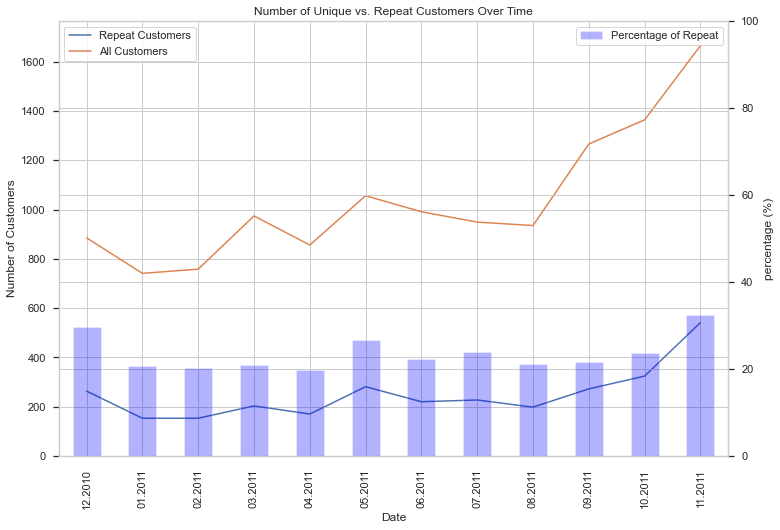

In [57]:
ax = pd.DataFrame(monthly_repeat_customers_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_unique_customers_df.values).plot(ax=ax,grid=True)

ax2 = pd.DataFrame(monthly_repeat_percentage.values).plot.bar(ax=ax,grid=True,secondary_y=True,color='blue',alpha=0.3)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Unique vs. Repeat Customers Over Time')

ax2.set_ylabel('percentage (%)')

ax.legend(['Repeat Customers', 'All Customers'])
ax2.legend(['Percentage of Repeat'], loc='upper right')

ax.set_ylim([0, monthly_unique_customers_df.values.max()+100])
ax2.set_ylim([0, 100])

plt.xticks(range(len(monthly_repeat_customers_df.index)), [x.strftime('%m.%Y') for x in monthly_repeat_customers_df.index], rotation=45)

plt.show()

In [58]:
monthly_revenue_df = df2.set_index('InvoiceDate')['AmountSpent'].resample('M').sum()

monthly_rev_repeat_customers_df = invoice_customer_df.set_index('InvoiceDate').groupby([
    pd.Grouper(freq='M'), 'CustomerID']).filter(lambda x: len(x) > 1).resample('M').sum()['AmountSpent']

# Let's get a percentage of the revenue from repeat customers to the overall monthly revenue
monthly_rev_perc_repeat_customers_df = monthly_rev_repeat_customers_df/monthly_revenue_df * 100.0
monthly_rev_perc_repeat_customers_df

InvoiceDate
2010-12-31    62.713792
2011-01-31    39.007101
2011-02-28    42.767478
2011-03-31    44.901787
2011-04-30    41.661132
2011-05-31    55.732401
2011-06-30    56.911595
2011-07-31    52.904475
2011-08-31    49.141899
2011-09-30    52.544416
2011-10-31    55.229144
2011-11-30    61.436148
Freq: M, Name: AmountSpent, dtype: float64

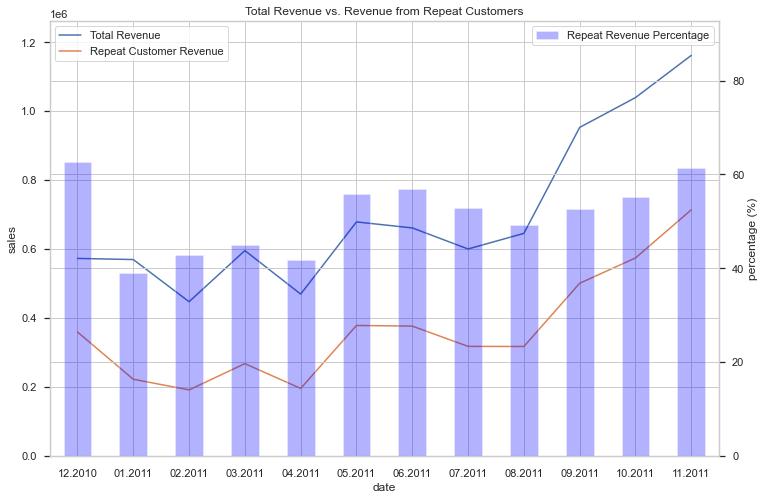

In [59]:
ax = pd.DataFrame(monthly_revenue_df.values).plot(figsize=(12,8))

pd.DataFrame(monthly_rev_repeat_customers_df.values).plot(ax=ax,grid=True,)

ax.set_xlabel('date')
ax.set_ylabel('sales')
ax.set_title('Total Revenue vs. Revenue from Repeat Customers')

ax.legend(['Total Revenue', 'Repeat Customer Revenue'])

ax.set_ylim([0, max(monthly_revenue_df.values)+100000])

ax2 = ax.twinx()

pd.DataFrame(monthly_rev_perc_repeat_customers_df.values).plot(ax=ax2,kind='bar',color='blue',alpha=0.3)

ax2.set_ylim([0, max(monthly_rev_perc_repeat_customers_df.values)+30])
ax2.set_ylabel('percentage (%)')
ax2.legend(['Repeat Revenue Percentage'])

ax2.set_xticklabels([x.strftime('%m.%Y') for x in monthly_rev_perc_repeat_customers_df.index])

plt.show()

In [60]:
date_item_df = df2.set_index('InvoiceDate').groupby([pd.Grouper(freq='M'), 'StockCode'])['Quantity'].sum()

date_item_df.head(15)

InvoiceDate  StockCode
2010-12-31   10002        224
             10120         16
             10123C         1
             10124A         4
             10124G         5
             10125        143
             10133        123
             10135        366
             11001         65
             15034         38
             15036        132
             15039         17
             15044A         6
             15044B         2
             15044C         7
Name: Quantity, dtype: int64

In [61]:
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

InvoiceDate StockCode  Quantity
2371  2011-11-30     84826     12551
1567  2011-11-30     23084     12393
827   2011-11-30     22197      8458
738   2011-11-30     22086      5919
2488  2011-11-30    85099B      5678
2385  2011-11-30     84879      5190
1135  2011-11-30     22578      4981
2498  2011-11-30    85123A      4861
1134  2011-11-30     22577      4582
2278  2011-11-30     84077      4500

In [63]:
last_month_sorted_df = date_item_df.loc['2011-11-30']
last_month_sorted_df = last_month_sorted_df.reset_index()
last_month_sorted_df.sort_values(by='Quantity', ascending=False).head(10)

InvoiceDate StockCode  Quantity
2371  2011-11-30     84826     12551
1567  2011-11-30     23084     12393
827   2011-11-30     22197      8458
738   2011-11-30     22086      5919
2488  2011-11-30    85099B      5678
2385  2011-11-30     84879      5190
1135  2011-11-30     22578      4981
2498  2011-11-30    85123A      4861
1134  2011-11-30     22577      4582
2278  2011-11-30     84077      4500

In [64]:
trending_itmes_df = date_item_df.reset_index().pivot('InvoiceDate','StockCode').fillna(0)

trending_itmes_df = trending_itmes_df.reset_index()
trending_itmes_df = trending_itmes_df.set_index('InvoiceDate')
trending_itmes_df.columns = trending_itmes_df.columns.droplevel(0)
trending_itmes_df

StockCode    10002  10080  10120  10123C  10124A  10124G  10125  10133  10135  \
InvoiceDate                                                                     
2010-12-31   224.0    0.0   16.0     1.0     4.0     5.0  143.0  123.0  366.0   
2011-01-31   337.0    0.0    0.0     0.0     0.0     0.0  160.0   90.0  400.0   
2011-02-28    50.0    2.0   30.0     0.0     3.0     0.0    0.0   37.0  263.0   
2011-03-31    23.0    0.0   29.0     4.0     5.0     4.0  112.0   83.0  117.0   
2011-04-30   189.0    0.0    0.0     0.0     0.0     0.0   82.0   75.0   30.0   
2011-05-31     0.0    0.0    3.0     0.0     0.0     0.0  107.0   33.0    8.0   
2011-06-30     0.0   48.0    0.0     0.0     0.0     0.0   13.0  448.0   55.0   
2011-07-31     0.0   24.0    5.0     0.0     0.0     0.0  176.0  662.0  177.0   
2011-08-31     0.0   60.0   35.0     0.0     0.0     0.0   85.0  640.0  152.0   
2011-09-30     0.0   60.0   10.0     0.0     0.0     4.0  210.0  193.0   68.0   
2011-10-31     0.0    6.0   10.0     0.0     0.0     0.0   50.0    0.0   69.0   
2011-11-30     0.0   91.0   49.0     0.0     4.0     4.0   62.0    0.0  165.0   

StockCode    11001  ...  90214R  90214S  90214V  90214Y  BANK CHARGES    C2  \
InvoiceDate         ...                                                       
2010-12-31    65.0  ...     0.0     3.0     1.0     0.0           1.0   9.0   
2011-01-31    32.0  ...     1.0     0.0     0.0     0.0           1.0   4.0   
2011-02-28    16.0  ...     1.0     0.0     0.0     0.0           0.0   4.0   
2011-03-31    49.0  ...     0.0     0.0     0.0     0.0           0.0  14.0   
2011-04-30    35.0  ...     0.0     0.0     0.0     0.0           1.0   8.0   
2011-05-31    96.0  ...     0.0     0.0     0.0     1.0           1.0  10.0   
2011-06-30    96.0  ...     0.0     0.0     1.0     0.0           0.0  11.0   
2011-07-31    53.0  ...     0.0     0.0     0.0     0.0           0.0  10.0   
2011-08-31   498.0  ...     0.0     0.0     0.0     0.0           0.0   7.0   
2011-09-30    79.0  ...     0.0     0.0     0.0     0.0           3.0  18.0   
2011-10-31   112.0  ...     0.0     0.0     0.0     0.0           2.0  14.0   
2011-11-30   101.0  ...     0.0    12.0     0.0     0.0           2.0  22.0   

StockCode    DOT       M  PADS   POST  
InvoiceDate                            
2010-12-31   0.0   195.0   0.0  220.0  
2011-01-31   0.0    40.0   0.0  250.0  
2011-02-28   0.0    84.0   0.0  154.0  
2011-03-31   0.0    87.0   0.0  238.0  
2011-04-30   0.0   105.0   1.0  135.0  
2011-05-31   0.0    22.0   0.0  243.0  
2011-06-30   0.0    40.0   0.0  238.0  
2011-07-31   0.0    91.0   1.0  205.0  
2011-08-31   1.0    30.0   0.0  237.0  
2011-09-30   5.0   522.0   2.0  279.0  
2011-10-31   5.0  1251.0   0.0  338.0  
2011-11-30   4.0  3893.0   0.0  460.0  

[12 rows x 3657 columns]

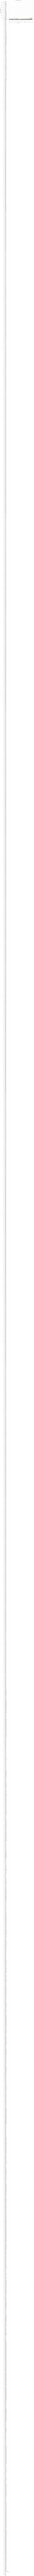

In [65]:
ax = pd.DataFrame(trending_itmes_df.values).plot(figsize=(12,8), grid=True,)

ax.set_ylabel('number of purchases')
ax.set_xlabel('date')
ax.set_title('Item Trends over Time')

ax.legend(trending_itmes_df.columns, loc='upper left')

plt.xticks(range(len(trending_itmes_df.index)), [x.strftime('%m.%Y') for x in trending_itmes_df.index], rotation=45)

plt.show()